In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [100]:
df=pd.read_csv('/content/Medical_insurance.csv')


In [101]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [103]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


#Exploratory Data Analysis

<ipython-input-104-e6cc88d9bd22>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, i+1)


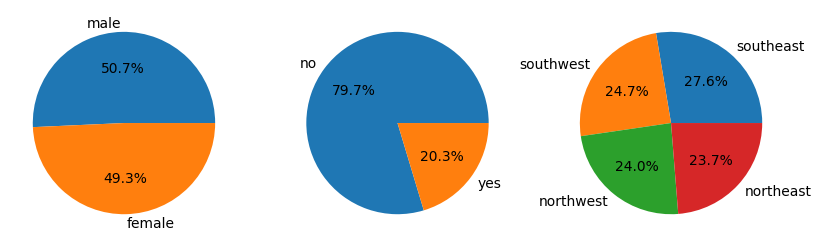

In [104]:
features= ['sex', 'smoker', 'region']
plt.subplots(figsize=(10,5))
for i, col in enumerate(features):
  plt.subplot(1,3, i+1)
  x= df[col].value_counts()
  plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

<ipython-input-105-b656e96b0464>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


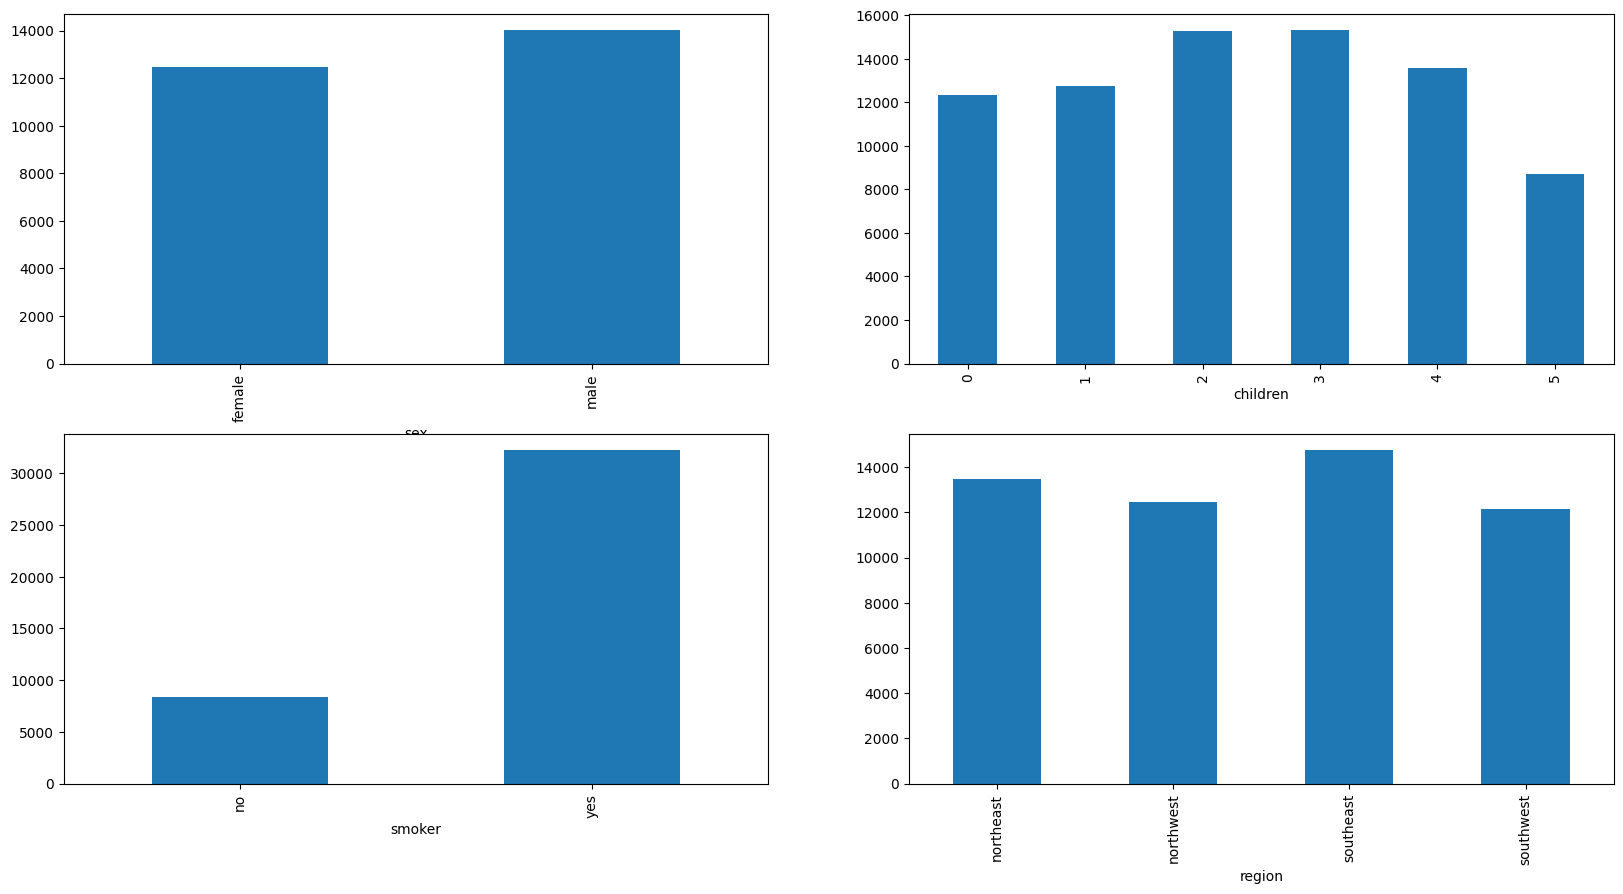

In [105]:

features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	df.groupby(col)['charges'].mean().plot.bar()
plt.show()


#preProcessing

In [106]:
df.drop_duplicates(inplace=True)

<Axes: ylabel='bmi'>

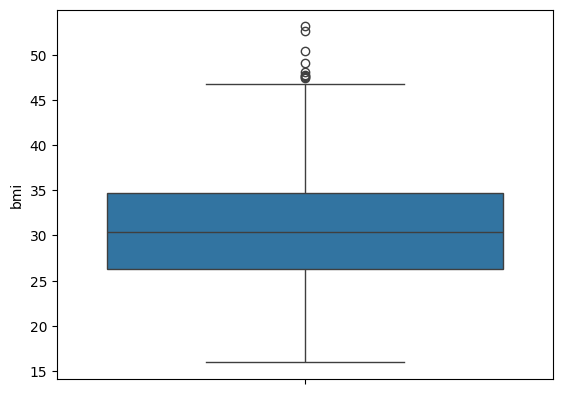

In [107]:
sns.boxplot(df['bmi'])

<Axes: ylabel='age'>

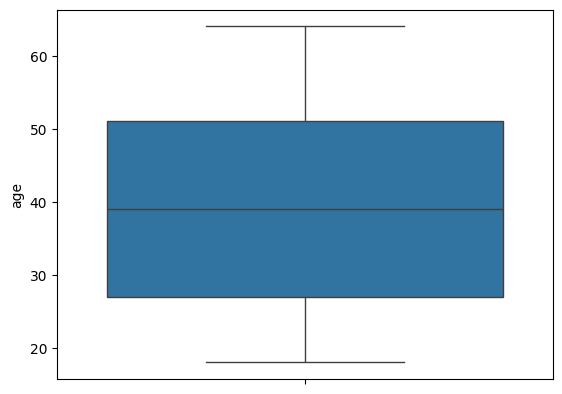

In [108]:
sns.boxplot(df['age'])

In [109]:
!pip install feature_engine

In [110]:
from feature_engine.outliers import ArbitraryOutlierCapper


In [111]:
capper = ArbitraryOutlierCapper(
    max_capping_dict={'bmi': 47.31},
    min_capping_dict={'bmi': 13.67},
)

capper.fit(df[['bmi']])

ArbitraryOutlierCapper(max_capping_dict={'bmi': 47.31},
                       min_capping_dict={'bmi': 13.67})

In [112]:
capper.right_tail_caps_

{'bmi': 47.31}

In [113]:
df[['bmi']] = capper.transform(df[['bmi']])

In [114]:
df['bmi'].max()

47.31

In [115]:
df['bmi'].mean()

30.65021316379955

In [116]:
(df['bmi']>40).sum()

91

In [117]:
df['bmi'].skew()

0.23279262449873908

In [118]:
df['age'].skew()

0.054780773126998195

#encoding


In [119]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3})

In [120]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.112000,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044830,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.112000,-0.044830,1.000000,0.013693,0.003150,0.156937,0.199062
children,0.041536,-0.017848,0.013693,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003150,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199062,0.067389,0.787234,0.010767,1.000000


In [121]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 1)

#model

LinearRegression

In [123]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [124]:
y1_pred=lr.predict(X_test)

In [125]:
from sklearn.metrics import r2_score
r2_score(Y_test,y1_pred)

0.7523624581290103

#polynomial

In [127]:
from sklearn.preprocessing import PolynomialFeatures
poly_power=PolynomialFeatures(degree=2)
X_train_new= poly_power.fit_transform(X_train)
X_test_new= poly_power.fit_transform(X_test)
lr2= LinearRegression()
lr2.fit(X_train_new,Y_train)

LinearRegression()

In [128]:
y2_pred= lr2.predict(X_test_new)

In [129]:
r2_score(Y_test, y2_pred)


0.8121103375794348

#decisonTree_regression

In [130]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [131]:
y3_pred = dt.predict(X_test)


In [132]:
accuracy = r2_score(Y_test, y3_pred)
print(accuracy)

0.6060480139477644


#randomForest

In [133]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [134]:
r2_score(Y_test,rfr.predict(X_test))

0.8231605696845785

In [141]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data['sex']=new_data['sex'].map({'male':0,'female':1})
new_data['region']=new_data['region'].map({'northwest':0,'northeast':1,'southeast':2,'southwest':3})
rfr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([17391.0150851])

#svr

In [135]:
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
scy = StandardScaler()
X_train_sc= scx.fit_transform(X_train)
X_test_sc= scx.fit_transform(X_test)
Y_train_sc= scy.fit_transform(Y_train.reshape(-1,1))

In [136]:
from sklearn.svm import SVR
svr= SVR(kernel ='rbf')
svr.fit(X_train_sc,Y_train_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [137]:
y4_pred= scy.inverse_transform(svr.predict(X_test_sc).reshape(-1,1))

In [138]:
r2_score(Y_test,y4_pred)

0.8454281922433535

In [142]:

new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data['sex']=new_data['sex'].map({'male':0,'female':1})
new_data['region']=new_data['region'].map({'northwest':0,'northeast':1,'southeast':2,'southwest':3})
result= scy.inverse_transform(svr.predict(new_data).reshape(-1,1))
result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


array([[17725.29178198]])